# data Collection

In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_colwidth', 50)
df = pd.read_csv(r"C:\Users\Pratyush\Downloads\tc1.csv")

In [3]:
df

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution
0,2142,ER-Classification quality improvement,"Hi,\nfind attached one example of possible cle...",(1) Teamcenter,(7) Classification,Active,​Moved to DATA Streaming
1,2182,ER-STEP Type Dataset,Hi\nIs it possible to add a „new“ dataset type...,(1) Teamcenter,(1) TC services,Active,NaN
2,2229,ER-BOM REPORT ISSUES,"Hi Omar,\nI just discussed this with Vinay. Be...",(1) Teamcenter,(14) Configuration Changes,Active,NaN
3,2497,ER-VS: Vekt fra TC til SAP,"Hi,\nFind attached list of wheigths. How can w...",(1) Teamcenter,(1) TC services,Active,NaN
4,2508,ER-VS: Vekt fra TC til SAP,Data Stream,(1) Teamcenter,(1) TC services,Active,NaN
...,...,...,...,...,...,...,...
2893,1326,DC0201996 error,Error during approval. Please check and comple...,(1) Teamcenter,(1) TC services,Resolved,​1
2894,1334,DC0202059 error,One more similar error. Please check and compl...,(1) Teamcenter,(1) TC services,Resolved,​1
2895,1344,Type of error when saving BOM in tc,"When saving BOM in TC, I get this message:\nDo...",(1) Teamcenter,(1) TC services,Resolved,​1
2896,1346,URGENT!! CAD files of standard parts,Can you please create CAD parts off the follow...,(1) Teamcenter,(1) TC services,Resolved,1


In [4]:
len(df[df["Category"]=="(1) Teamcenter"])


2749

In [5]:
df['Title'].nunique()

2565

# data cleaning

In [6]:
 df.isnull().sum()

IssueID          0
Title            0
Description      2
Category         0
Sub-Category     0
IssueStatus      0
Resolution      74
dtype: int64

In [7]:
df["Description"].fillna("No Description", inplace = True)
df["Resolution"].fillna("No Resolution", inplace = True)
df

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution
0,2142,ER-Classification quality improvement,"Hi,\nfind attached one example of possible cle...",(1) Teamcenter,(7) Classification,Active,​Moved to DATA Streaming
1,2182,ER-STEP Type Dataset,Hi\nIs it possible to add a „new“ dataset type...,(1) Teamcenter,(1) TC services,Active,No Resolution
2,2229,ER-BOM REPORT ISSUES,"Hi Omar,\nI just discussed this with Vinay. Be...",(1) Teamcenter,(14) Configuration Changes,Active,No Resolution
3,2497,ER-VS: Vekt fra TC til SAP,"Hi,\nFind attached list of wheigths. How can w...",(1) Teamcenter,(1) TC services,Active,No Resolution
4,2508,ER-VS: Vekt fra TC til SAP,Data Stream,(1) Teamcenter,(1) TC services,Active,No Resolution
...,...,...,...,...,...,...,...
2893,1326,DC0201996 error,Error during approval. Please check and comple...,(1) Teamcenter,(1) TC services,Resolved,​1
2894,1334,DC0202059 error,One more similar error. Please check and compl...,(1) Teamcenter,(1) TC services,Resolved,​1
2895,1344,Type of error when saving BOM in tc,"When saving BOM in TC, I get this message:\nDo...",(1) Teamcenter,(1) TC services,Resolved,​1
2896,1346,URGENT!! CAD files of standard parts,Can you please create CAD parts off the follow...,(1) Teamcenter,(1) TC services,Resolved,1


In [8]:
df.isnull().sum()

IssueID         0
Title           0
Description     0
Category        0
Sub-Category    0
IssueStatus     0
Resolution      0
dtype: int64

In [9]:
# remove punctuations
import string
string.punctuation

def remove_punctuation(txt):
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

In [10]:
#df['Descprition'] = df['Description'].apply(lambda x: remove_punctuation(x))
df['Title'] = df['Title'].apply(lambda x: remove_punctuation(x))
df['Description'] = df['Description'].apply(lambda x: remove_punctuation(x))
df['Category'] = df['Category'].apply(lambda x: remove_punctuation(x))
df['SubCategory'] = df['Sub-Category'].apply(lambda x: remove_punctuation(x))
df['IssueStatus'] = df['IssueStatus'].apply(lambda x: remove_punctuation(x))
df['Resolution'] = df['Resolution'].apply(lambda x: remove_punctuation(x))


df.head()

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution,SubCategory
0,2142,ERClassification quality improvement,Hi\nfind attached one example of possible clea...,1 Teamcenter,(7) Classification,Active,​Moved to DATA Streaming,7 Classification
1,2182,ERSTEP Type Dataset,Hi\nIs it possible to add a „new“ dataset type...,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC services
2,2229,ERBOM REPORT ISSUES,Hi Omar\nI just discussed this with Vinay Belo...,1 Teamcenter,(14) Configuration Changes,Active,No Resolution,14 Configuration Changes
3,2497,ERVS Vekt fra TC til SAP,Hi\nFind attached list of wheigths How can we ...,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC services
4,2508,ERVS Vekt fra TC til SAP,Data Stream,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC services


In [11]:
#tokenization

import re

def tokenize(txt):
    tokens = re.split('\W+', txt)
    return tokens

df['Title'] = df['Title'].apply(lambda x: tokenize(x))
df['Description'] = df['Description'].apply(lambda x: tokenize(x))
df['Category'] = df['Category'].apply(lambda x: tokenize(x))
df['SubCategory'] = df['SubCategory'].apply(lambda x: tokenize(x))
df['IssueStatus'] = df['IssueStatus'].apply(lambda x: tokenize(x))
df['Resolution'] = df['Resolution'].apply(lambda x: tokenize(x))



df.head()

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution,SubCategory
0,2142,"[ERClassification, quality, improvement]","[Hi, find, attached, one, example, of, possibl...","[1, Teamcenter]",(7) Classification,[Active],"[, Moved, to, DATA, Streaming]","[7, Classification]"
1,2182,"[ERSTEP, Type, Dataset]","[Hi, Is, it, possible, to, add, a, new, datase...","[1, Teamcenter]",(1) TC services,[Active],"[No, Resolution]","[1, TC, services]"
2,2229,"[ERBOM, REPORT, ISSUES]","[Hi, Omar, I, just, discussed, this, with, Vin...","[1, Teamcenter]",(14) Configuration Changes,[Active],"[No, Resolution]","[14, Configuration, Changes]"
3,2497,"[ERVS, Vekt, fra, TC, til, SAP]","[Hi, Find, attached, list, of, wheigths, How, ...","[1, Teamcenter]",(1) TC services,[Active],"[No, Resolution]","[1, TC, services]"
4,2508,"[ERVS, Vekt, fra, TC, til, SAP]","[Data, Stream]","[1, Teamcenter]",(1) TC services,[Active],"[No, Resolution]","[1, TC, services]"


In [12]:
#stopwords
import nltk
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean

df['Title'] = df['Title'].apply(lambda x: remove_stopwords(x))
df['Description'] = df['Description'].apply(lambda x: remove_stopwords(x))
df['Category'] = df['Category'].apply(lambda x: remove_stopwords(x))
df['SubCategory'] = df['SubCategory'].apply(lambda x: remove_stopwords(x))
df['IssueStatus'] = df['IssueStatus'].apply(lambda x: remove_stopwords(x))
df['Resolution'] = df['Resolution'].apply(lambda x: remove_stopwords(x))

df.head()


,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution,SubCategory
0,2142,"[ERClassification, quality, improvement]","[Hi, find, attached, one, example, possible, c...","[1, Teamcenter]",(7) Classification,[Active],"[, Moved, DATA, Streaming]","[7, Classification]"
1,2182,"[ERSTEP, Type, Dataset]","[Hi, Is, possible, add, new, dataset, type, li...","[1, Teamcenter]",(1) TC services,[Active],"[No, Resolution]","[1, TC, services]"
2,2229,"[ERBOM, REPORT, ISSUES]","[Hi, Omar, I, discussed, Vinay, Below, fix, is...","[1, Teamcenter]",(14) Configuration Changes,[Active],"[No, Resolution]","[14, Configuration, Changes]"
3,2497,"[ERVS, Vekt, fra, TC, til, SAP]","[Hi, Find, attached, list, wheigths, How, auto...","[1, Teamcenter]",(1) TC services,[Active],"[No, Resolution]","[1, TC, services]"
4,2508,"[ERVS, Vekt, fra, TC, til, SAP]","[Data, Stream]","[1, Teamcenter]",(1) TC services,[Active],"[No, Resolution]","[1, TC, services]"


In [13]:
#stemming(reducing derrived words to their root words)

#import nltk 
#from nltk.stem import PorterStemmer
#ps = PorterStemmer()

#def stemming(tokenized_text):
 #   text = [ps.stem(word) for word in tokenized_text]
  #  return text

#df['Title'] = df['Title'].apply(lambda x: stemming(x))
#df['Description'] = df['Description'].apply(lambda x: stemming(x))
#df['Category'] = df['Category'].apply(lambda x: stemming(x))
#df['SubCategory'] = df['SubCategory'].apply(lambda x: stemming(x))
#df['IssueStatus'] = df['IssueStatus'].apply(lambda x: stemming(x))
#df['Resolution'] = df['Resolution'].apply(lambda x: stemming(x))

#df.head()

In [14]:
#lemmatization(more accurate than stemming)
import nltk
wn = nltk.WordNetLemmatizer()
#ps = nltk.PorterStemmer()



In [15]:
def lemmatization(token_txt):
    text = [wn.lemmatize(word, pos='v') for word in token_txt]
    return text

df['Title'] = df['Title'].apply(lambda x: lemmatization(x))
df['Description'] = df['Description'].apply(lambda x: lemmatization(x))
df['Category'] = df['Category'].apply(lambda x: lemmatization(x))
df['SubCategory'] = df['SubCategory'].apply(lambda x: lemmatization(x))
df['IssueStatus'] = df['IssueStatus'].apply(lambda x: lemmatization(x))
df['Resolution'] = df['Resolution'].apply(lambda x: lemmatization(x))

df


,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution,SubCategory
0,2142,"[ERClassification, quality, improvement]","[Hi, find, attach, one, example, possible, cle...","[1, Teamcenter]",(7) Classification,[Active],"[, Moved, DATA, Streaming]","[7, Classification]"
1,2182,"[ERSTEP, Type, Dataset]","[Hi, Is, possible, add, new, dataset, type, li...","[1, Teamcenter]",(1) TC services,[Active],"[No, Resolution]","[1, TC, service]"
2,2229,"[ERBOM, REPORT, ISSUES]","[Hi, Omar, I, discuss, Vinay, Below, fix, issu...","[1, Teamcenter]",(14) Configuration Changes,[Active],"[No, Resolution]","[14, Configuration, Changes]"
3,2497,"[ERVS, Vekt, fra, TC, til, SAP]","[Hi, Find, attach, list, wheigths, How, automa...","[1, Teamcenter]",(1) TC services,[Active],"[No, Resolution]","[1, TC, service]"
4,2508,"[ERVS, Vekt, fra, TC, til, SAP]","[Data, Stream]","[1, Teamcenter]",(1) TC services,[Active],"[No, Resolution]","[1, TC, service]"
...,...,...,...,...,...,...,...,...
2893,1326,"[DC0201996, error]","[Error, approval, Please, check, complete, Wha...","[1, Teamcenter]",(1) TC services,[Resolved],"[, 1]","[1, TC, service]"
2894,1334,"[DC0202059, error]","[One, similar, error, Please, check, complete]","[1, Teamcenter]",(1) TC services,[Resolved],"[, 1]","[1, TC, service]"
2895,1344,"[Type, error, save, BOM, tc]","[When, save, BOM, TC, I, get, message, Does, s...","[1, Teamcenter]",(1) TC services,[Resolved],"[, 1]","[1, TC, service]"
2896,1346,"[URGENT, CAD, file, standard, part]","[Can, please, create, CAD, part, follow, part,...","[1, Teamcenter]",(1) TC services,[Resolved],[1],"[1, TC, service]"


In [16]:
import re
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer = lemmatization)

X = cv.fit_transform(df['Title'])
print(X.shape)

(2898, 3473)


In [17]:
print(cv.get_feature_names())

['', '000384', '004333', '01', '0180', '0181', '01810182', '02', '03102019', '046117', '069', '093603Classification', '1', '100', '10010', '100BSS', '108', '1080', '109', '11', '11024', '1110', '111324086', '111324586', '111325086', '111339986', '111366786', '111372786', '111387186', '111410786', '111438786', '111445786', '111455486', '111455586', '111465086', '111485586', '111570786', '11161', '111663586', '11pdf', '12', '12400', '12408', '12410', '12412', '129', '13287', '13288', '14008', '14016', '14016C1111011758BOMREPORT15062018103146xlsx', '14519', '1454447', '150', '155', '161017HRSLong', '1641927', '1641927317130urgent', '1642829', '1643036', '16430C1111008173BOMREPORT18022019130245xlsx', '17047', '1729495Engine', '17297', '17297319', '17318', '1732024', '17326', '1732728', '17333', '17345', '1734651', '177', '180', '18014', '180418', '181', '19002100', '1950203', '2', '200028622', '200031838', '200041391200030783', '201117', '20170914Tegnuts', '20181127', '204828B', '21122019'

# converting data into machine lang(Data Vectorization)

In [18]:
df_sample = df
cv1 = CountVectorizer(analyzer = lemmatization)

Xc = cv1.fit_transform(df_sample['Title'])

print(X.shape)

(2898, 3473)


In [19]:
df1 = pd.DataFrame(Xc.toarray(), columns=cv1.get_feature_names())
df1

,,000384,004333,01,0180,0181,01810182,02,03102019,046117,...,yet,Ø100,Ø10x1,Ø10x15,Ø381,Ø95,å,åpne,åpnes,åpning
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#df_sample1 = df
#cv2 = CountVectorizer(analyzer = lemmatization)

Y = cv1.fit_transform(df_sample['Description'])


print(Y.shape)

(2898, 8640)


In [21]:
df2 = pd.DataFrame(Y.toarray(), columns=cv1.get_feature_names())
df2

,,0,000,0001,00045139,00054760600,000567,001977,00441733,00444037,...,ær,ø10x1,ø12,ø16x45,ø17A4,ø186,ø305,ø32,ø321mm,ø90
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2895,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2896,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#df_sample2 = df
#cv3 = CountVectorizer(analyzer = lemmatization)

Z = cv1.fit_transform(df_sample['Category'])


print(Z.shape)


(2898, 12)


In [23]:
df3 = pd.DataFrame(Z.toarray(), columns=cv1.get_feature_names())
df3

,1,10,2,3,5,Corrections,Data,Errros,NX,T4S,Teamcenter,User
0,1,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2893,1,0,0,0,0,0,0,0,0,0,1,0
2894,1,0,0,0,0,0,0,0,0,0,1,0
2895,1,0,0,0,0,0,0,0,0,0,1,0
2896,1,0,0,0,0,0,0,0,0,0,1,0


In [24]:
#df_sample3 = df
#cv4 = CountVectorizer(analyzer = lemmatization)

A = cv1.fit_transform(df_sample['SubCategory'])


print(A.shape)


(2898, 54)


In [25]:
df4 = pd.DataFrame(A.toarray(), columns=cv1.get_feature_names())
df4

,1,11,12,13,14,15,16,17,18,2,...,Network,Others,Ownership,Report,Request,TC,Upload,Workflow,issue,service
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2894,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2895,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2896,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [26]:
#df_sample4 = df
#cv5 = CountVectorizer(analyzer = lemmatization)

B = cv1.fit_transform(df_sample['IssueStatus'])


print(B.shape)


(2898, 3)


In [27]:
df5 = pd.DataFrame(B.toarray(), columns=cv1.get_feature_names())
df5

,Active,Closed,Resolved
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
2893,0,0,1
2894,0,0,1
2895,0,0,1
2896,0,0,1


In [28]:
#df_sample5 = df
#cv6 = CountVectorizer(analyzer = lemmatization)

C = cv1.fit_transform(df_sample['Resolution'])


print(C.shape)


(2898, 5676)


In [29]:
df6 = pd.DataFrame(C.toarray(), columns=cv1.get_feature_names())
df6

,,0,0019,00BC2693,01,01012100,011,011m,0180,018001810182,...,àAs,àCXSS00704023,àChanged,àEnd,àFor,àGAdrawing,àOwnership,àRight,àUser,àWe
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2894,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2895,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
def lemmatization1(token_txt):
    text = " ".join([wn.lemmatize(word, pos='v') for word in token_txt])
    return text

df['Title'] = df['Title'].apply(lambda x: lemmatization1(x))
df['Description'] = df['Description'].apply(lambda x: lemmatization1(x))
df['Category'] = df['Category'].apply(lambda x: lemmatization1(x))
df['SubCategory'] = df['SubCategory'].apply(lambda x: lemmatization1(x))
df['IssueStatus'] = df['IssueStatus'].apply(lambda x: lemmatization1(x))
df['Resolution'] = df['Resolution'].apply(lambda x: lemmatization1(x))

df


,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution,SubCategory
0,2142,ERClassification quality improvement,Hi find attach one example possible cleanups n...,1 Teamcenter,(7) Classification,Active,Moved DATA Streaming,7 Classification
1,2182,ERSTEP Type Dataset,Hi Is possible add new dataset type list Teamc...,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service
2,2229,ERBOM REPORT ISSUES,Hi Omar I discuss Vinay Below fix issue In Str...,1 Teamcenter,(14) Configuration Changes,Active,No Resolution,14 Configuration Changes
3,2497,ERVS Vekt fra TC til SAP,Hi Find attach list wheigths How automate uplo...,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service
4,2508,ERVS Vekt fra TC til SAP,Data Stream,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service
...,...,...,...,...,...,...,...,...
2893,1326,DC0201996 error,Error approval Please check complete What reas...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service
2894,1334,DC0202059 error,One similar error Please check complete,1 Teamcenter,(1) TC services,Resolved,1,1 TC service
2895,1344,Type error save BOM tc,When save BOM TC I get message Does something ...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service
2896,1346,URGENT CAD file standard part,Can please create CAD part follow part C111101...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service


# Frequency of issues

In [31]:
corpus = df['Title']
corpus

0       ERClassification quality improvement
1                        ERSTEP Type Dataset
2                        ERBOM REPORT ISSUES
3                   ERVS Vekt fra TC til SAP
4                   ERVS Vekt fra TC til SAP
                        ...                 
2893                         DC0201996 error
2894                         DC0202059 error
2895                  Type error save BOM tc
2896           URGENT CAD file standard part
2897     Search Legacy Items give noe result
Name: Title, Length: 2898, dtype: object

In [32]:
stopwords = nltk.corpus.stopwords.words('english')
stop_words = stopwords


In [33]:
df_sample = df
cv1 = CountVectorizer(max_df=0.8, max_features=10000, stop_words=stop_words, ngram_range=(1,3))

D = cv1.fit_transform(df_sample['Title'])
m=list(cv.vocabulary_.keys())[:10]

#print(D.shape)


In [34]:
#df7 = pd.DataFrame(D.toarray(), columns=cv1.get_feature_names())
#df7



In [35]:
from nltk.probability import FreqDist
fdist = FreqDist(corpus)
print(fdist)

<FreqDist with 2529 samples and 2898 outcomes>


In [36]:
fdist.most_common(1000)

[('Release item', 30),
 ('Rename CXSS', 21),
 ('Release material', 20),
 ('Renaming', 16),
 ('High', 14),
 ('My Teamcenter Teamcenter 8', 10),
 ('Rename W', 10),
 ('Release materials', 10),
 ('3D bolt', 8),
 ('Release issue', 7),
 ('TC error', 7),
 ('Unrelease', 7),
 ('Create CXSS', 7),
 ('Release item SAP', 6),
 ('New items Need 3D model', 6),
 ('MRB generation', 6),
 ('Rename', 5),
 ('Error message', 5),
 ('unrelease', 5),
 ('My Teamcenter Teamcenter 11', 5),
 ('New standard part', 5),
 ('Help make CXSS', 5),
 ('Release Material', 4),
 ('Please release SAP', 4),
 ('New items Need 3D model change material', 4),
 ('BOM report Teamcenter', 4),
 ('ERTC issue', 3),
 ('Error release', 3),
 ('REVISE', 3),
 ('Wrong classification', 3),
 ('Ownership', 3),
 ('316250 2201112 HHI MSC P158 Revision Plant Spec C1111006808', 3),
 ('change ownership', 3),
 ('Release material SAP', 3),
 ('Unrelease item', 3),
 ('BCs SAP', 3),
 ('Renaming CXSS', 3),
 ('rename', 3),
 ('Delete item revision', 3),
 ('Reg

In [37]:
fdist.tabulate(3)

    Release item      Rename CXSS Release material 
              30               21               20 


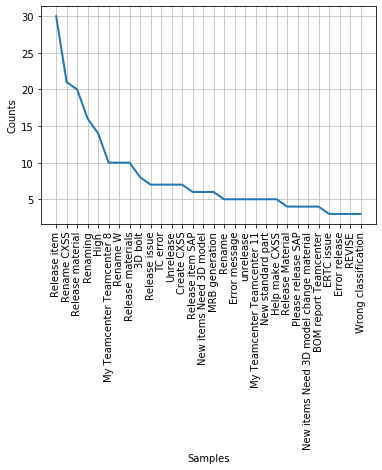

In [38]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

                        Keyword  Frequency
0      approved bom release sap         21
1             new items need 3d         11
2           items need 3d model         11
3       vs approved bom release         11
4        bergen engines as prod         10
5              nx85 nx setup 27          6
6            nx setup 27 bergen          6
7       setup 27 bergen engines          6
8          27 bergen engines as          6
9        316250 2201112 hhi msc          6
10         2201112 hhi msc p158          6
11  my teamcenter teamcenter 11          6
12         need 3d model change          5
13     3d model change material          5
14      approve vs approved bom          5
15    generate pdf mrb dc006358          5
16    generate pdf mrb dc006452          5
17        rreb 317090 eng 12408          4
18    317090 eng 12408 c2533l6a          4
19    eng 12408 c2533l6a fitjar          4


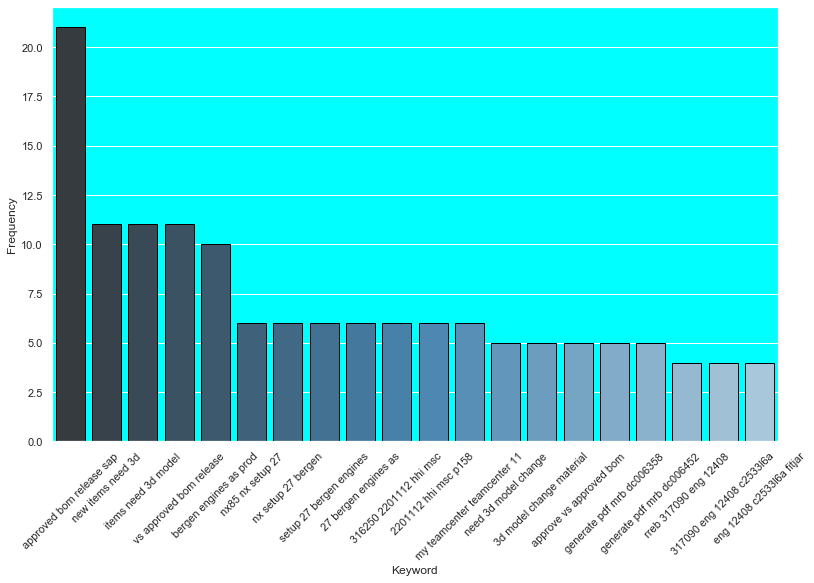

In [39]:
import pandas
fwords=["please",'to',"hi","hello","on"]
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(4,4),  
            max_features=2000).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    words_freq=[i for i in words_freq if i not in fwords ]
    return words_freq[:n]


# Convert most freq words to dataframe for plotting bar plot, save as CSV
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Keyword", "Frequency"]
print(top_df)
#top_df.to_csv(file_prefix + '_top_words.csv')

# Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Keyword", y="Frequency", data=top_df, palette="Blues_d", edgecolor = 'black')
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_facecolor('cyan')
#g.figure.savefig(file_prefix + "_keyword.png", bbox_inches = "tight")

In [40]:
df

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution,SubCategory
0,2142,ERClassification quality improvement,Hi find attach one example possible cleanups n...,1 Teamcenter,(7) Classification,Active,Moved DATA Streaming,7 Classification
1,2182,ERSTEP Type Dataset,Hi Is possible add new dataset type list Teamc...,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service
2,2229,ERBOM REPORT ISSUES,Hi Omar I discuss Vinay Below fix issue In Str...,1 Teamcenter,(14) Configuration Changes,Active,No Resolution,14 Configuration Changes
3,2497,ERVS Vekt fra TC til SAP,Hi Find attach list wheigths How automate uplo...,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service
4,2508,ERVS Vekt fra TC til SAP,Data Stream,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service
...,...,...,...,...,...,...,...,...
2893,1326,DC0201996 error,Error approval Please check complete What reas...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service
2894,1334,DC0202059 error,One similar error Please check complete,1 Teamcenter,(1) TC services,Resolved,1,1 TC service
2895,1344,Type error save BOM tc,When save BOM TC I get message Does something ...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service
2896,1346,URGENT CAD file standard part,Can please create CAD part follow part C111101...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service


In [41]:
#from sklearn.feature_extraction.text import CountVectorizer
#count_vect = CountVectorizer()
#X_train_counts = count_vect.fit_transform(df_sample['Title'])
#X_train_counts

In [42]:
#from sklearn.feature_extraction.text import TfidfTransformer
#tfidf_transformer = TfidfTransformer()
#X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#X_train_tfidf.shape

# Categorization

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

In [44]:
#Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['Title'],df['Category'],test_size=0.3)
df

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution,SubCategory
0,2142,ERClassification quality improvement,Hi find attach one example possible cleanups n...,1 Teamcenter,(7) Classification,Active,Moved DATA Streaming,7 Classification
1,2182,ERSTEP Type Dataset,Hi Is possible add new dataset type list Teamc...,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service
2,2229,ERBOM REPORT ISSUES,Hi Omar I discuss Vinay Below fix issue In Str...,1 Teamcenter,(14) Configuration Changes,Active,No Resolution,14 Configuration Changes
3,2497,ERVS Vekt fra TC til SAP,Hi Find attach list wheigths How automate uplo...,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service
4,2508,ERVS Vekt fra TC til SAP,Data Stream,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service
...,...,...,...,...,...,...,...,...
2893,1326,DC0201996 error,Error approval Please check complete What reas...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service
2894,1334,DC0202059 error,One similar error Please check complete,1 Teamcenter,(1) TC services,Resolved,1,1 TC service
2895,1344,Type error save BOM tc,When save BOM TC I get message Does something ...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service
2896,1346,URGENT CAD file standard part,Can please create CAD part follow part C111101...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service


In [45]:
df['Title'].dropna(inplace=True)
#  Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
from nltk.tokenize import word_tokenize


df['Title'] = [entry.lower() for entry in df['Title']]
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
df['Title']= [word_tokenize(entry) for entry in df['Title']]
# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun

from nltk.corpus import wordnet as wn
from collections import defaultdict
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV


In [46]:
from nltk import pos_tag
for index,entry in enumerate(df['Title']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    df.loc[index,'Title_final'] = str(Final_words)
    
df
df.fillna(value=' ', inplace=True)
df

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution,SubCategory,Title_final
0,2142,"[erclassification, quality, improvement]",Hi find attach one example possible cleanups n...,1 Teamcenter,(7) Classification,Active,Moved DATA Streaming,7 Classification,"['erclassification', 'quality', 'improvement']"
1,2182,"[erstep, type, dataset]",Hi Is possible add new dataset type list Teamc...,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service,"['erstep', 'type', 'dataset']"
2,2229,"[erbom, report, issues]",Hi Omar I discuss Vinay Below fix issue In Str...,1 Teamcenter,(14) Configuration Changes,Active,No Resolution,14 Configuration Changes,"['erbom', 'report', 'issue']"
3,2497,"[ervs, vekt, fra, tc, til, sap]",Hi Find attach list wheigths How automate uplo...,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service,"['ervs', 'vekt', 'fra', 'tc', 'til', 'sap']"
4,2508,"[ervs, vekt, fra, tc, til, sap]",Data Stream,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service,"['ervs', 'vekt', 'fra', 'tc', 'til', 'sap']"
...,...,...,...,...,...,...,...,...,...
2893,1326,"[dc0201996, error]",Error approval Please check complete What reas...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service,['error']
2894,1334,"[dc0202059, error]",One similar error Please check complete,1 Teamcenter,(1) TC services,Resolved,1,1 TC service,['error']
2895,1344,"[type, error, save, bom, tc]",When save BOM TC I get message Does something ...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service,"['type', 'error', 'save', 'bom', 'tc']"
2896,1346,"[urgent, cad, file, standard, part]",Can please create CAD part follow part C111101...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service,"['urgent', 'cad', 'file', 'standard', 'part']"


In [47]:
z1 = []
for i in df['Title_final']:
    k = ' '
    for j in i:
        if j.isalpha() or j== " ":
            k+=j
    z1.append(k)
df["Title_final"]=z1
df

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution,SubCategory,Title_final
0,2142,"[erclassification, quality, improvement]",Hi find attach one example possible cleanups n...,1 Teamcenter,(7) Classification,Active,Moved DATA Streaming,7 Classification,erclassification quality improvement
1,2182,"[erstep, type, dataset]",Hi Is possible add new dataset type list Teamc...,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service,erstep type dataset
2,2229,"[erbom, report, issues]",Hi Omar I discuss Vinay Below fix issue In Str...,1 Teamcenter,(14) Configuration Changes,Active,No Resolution,14 Configuration Changes,erbom report issue
3,2497,"[ervs, vekt, fra, tc, til, sap]",Hi Find attach list wheigths How automate uplo...,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service,ervs vekt fra tc til sap
4,2508,"[ervs, vekt, fra, tc, til, sap]",Data Stream,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service,ervs vekt fra tc til sap
...,...,...,...,...,...,...,...,...,...
2893,1326,"[dc0201996, error]",Error approval Please check complete What reas...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service,error
2894,1334,"[dc0202059, error]",One similar error Please check complete,1 Teamcenter,(1) TC services,Resolved,1,1 TC service,error
2895,1344,"[type, error, save, bom, tc]",When save BOM TC I get message Does something ...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service,type error save bom tc
2896,1346,"[urgent, cad, file, standard, part]",Can please create CAD part follow part C111101...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service,urgent cad file standard part


In [48]:
df['Description'].dropna(inplace=True)
#  Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
from nltk.tokenize import word_tokenize


df['Description'] = [entry.lower() for entry in df['Description']]
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
df['Description']= [word_tokenize(entry) for entry in df['Description']]
# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun

from nltk.corpus import wordnet as wn
from collections import defaultdict
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV


In [49]:
from nltk import pos_tag
for index,entry in enumerate(df['Description']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    df.loc[index,'Description_final'] = str(Final_words)
    
df
df.fillna(value=' ', inplace=True)
df

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution,SubCategory,Title_final,Description_final
0,2142,"[erclassification, quality, improvement]","[hi, find, attach, one, example, possible, cle...",1 Teamcenter,(7) Classification,Active,Moved DATA Streaming,7 Classification,erclassification quality improvement,"['hi', 'find', 'attach', 'one', 'example', 'po..."
1,2182,"[erstep, type, dataset]","[hi, is, possible, add, new, dataset, type, li...",1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service,erstep type dataset,"['hi', 'possible', 'add', 'new', 'dataset', 't..."
2,2229,"[erbom, report, issues]","[hi, omar, i, discuss, vinay, below, fix, issu...",1 Teamcenter,(14) Configuration Changes,Active,No Resolution,14 Configuration Changes,erbom report issue,"['hi', 'omar', 'discuss', 'vinay', 'fix', 'iss..."
3,2497,"[ervs, vekt, fra, tc, til, sap]","[hi, find, attach, list, wheigths, how, automa...",1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service,ervs vekt fra tc til sap,"['hi', 'find', 'attach', 'list', 'wheigths', '..."
4,2508,"[ervs, vekt, fra, tc, til, sap]","[data, stream]",1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service,ervs vekt fra tc til sap,"['data', 'stream']"
...,...,...,...,...,...,...,...,...,...,...
2893,1326,"[dc0201996, error]","[error, approval, please, check, complete, wha...",1 Teamcenter,(1) TC services,Resolved,1,1 TC service,error,"['error', 'approval', 'please', 'check', 'comp..."
2894,1334,"[dc0202059, error]","[one, similar, error, please, check, complete]",1 Teamcenter,(1) TC services,Resolved,1,1 TC service,error,"['one', 'similar', 'error', 'please', 'check',..."
2895,1344,"[type, error, save, bom, tc]","[when, save, bom, tc, i, get, message, does, s...",1 Teamcenter,(1) TC services,Resolved,1,1 TC service,type error save bom tc,"['save', 'bom', 'tc', 'get', 'message', 'somet..."
2896,1346,"[urgent, cad, file, standard, part]","[can, please, create, cad, part, follow, part,...",1 Teamcenter,(1) TC services,Resolved,1,1 TC service,urgent cad file standard part,"['please', 'create', 'cad', 'part', 'follow', ..."


In [50]:
z2 = []
for i in df['Description_final']:
    k = ' '
    for j in i:
        if j.isalpha() or j== " ":
            k+=j
    z2.append(k)
df["Description_final"]=z2
df

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution,SubCategory,Title_final,Description_final
0,2142,"[erclassification, quality, improvement]","[hi, find, attach, one, example, possible, cle...",1 Teamcenter,(7) Classification,Active,Moved DATA Streaming,7 Classification,erclassification quality improvement,hi find attach one example possible cleanup n...
1,2182,"[erstep, type, dataset]","[hi, is, possible, add, new, dataset, type, li...",1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service,erstep type dataset,hi possible add new dataset type list teamcen...
2,2229,"[erbom, report, issues]","[hi, omar, i, discuss, vinay, below, fix, issu...",1 Teamcenter,(14) Configuration Changes,Active,No Resolution,14 Configuration Changes,erbom report issue,hi omar discuss vinay fix issue structure man...
3,2497,"[ervs, vekt, fra, tc, til, sap]","[hi, find, attach, list, wheigths, how, automa...",1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service,ervs vekt fra tc til sap,hi find attach list wheigths automate upload ...
4,2508,"[ervs, vekt, fra, tc, til, sap]","[data, stream]",1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service,ervs vekt fra tc til sap,data stream
...,...,...,...,...,...,...,...,...,...,...
2893,1326,"[dc0201996, error]","[error, approval, please, check, complete, wha...",1 Teamcenter,(1) TC services,Resolved,1,1 TC service,error,error approval please check complete reason e...
2894,1334,"[dc0202059, error]","[one, similar, error, please, check, complete]",1 Teamcenter,(1) TC services,Resolved,1,1 TC service,error,one similar error please check complete
2895,1344,"[type, error, save, bom, tc]","[when, save, bom, tc, i, get, message, does, s...",1 Teamcenter,(1) TC services,Resolved,1,1 TC service,type error save bom tc,save bom tc get message something error relea...
2896,1346,"[urgent, cad, file, standard, part]","[can, please, create, cad, part, follow, part,...",1 Teamcenter,(1) TC services,Resolved,1,1 TC service,urgent cad file standard part,please create cad part follow part standard f...


In [51]:
df.drop(['Title', 'Category', 'IssueStatus', 'Resolution', 'IssueID', 'Description'], axis = 1)

,Sub-Category,SubCategory,Title_final,Description_final
0,(7) Classification,7 Classification,erclassification quality improvement,hi find attach one example possible cleanup n...
1,(1) TC services,1 TC service,erstep type dataset,hi possible add new dataset type list teamcen...
2,(14) Configuration Changes,14 Configuration Changes,erbom report issue,hi omar discuss vinay fix issue structure man...
3,(1) TC services,1 TC service,ervs vekt fra tc til sap,hi find attach list wheigths automate upload ...
4,(1) TC services,1 TC service,ervs vekt fra tc til sap,data stream
...,...,...,...,...
2893,(1) TC services,1 TC service,error,error approval please check complete reason e...
2894,(1) TC services,1 TC service,error,one similar error please check complete
2895,(1) TC services,1 TC service,type error save bom tc,save bom tc get message something error relea...
2896,(1) TC services,1 TC service,urgent cad file standard part,please create cad part follow part standard f...


In [52]:
df = df.reindex(columns=['Title_final', 'Description_final', 'SubCategory'])
df

,Title_final,Description_final,SubCategory
0,erclassification quality improvement,hi find attach one example possible cleanup n...,7 Classification
1,erstep type dataset,hi possible add new dataset type list teamcen...,1 TC service
2,erbom report issue,hi omar discuss vinay fix issue structure man...,14 Configuration Changes
3,ervs vekt fra tc til sap,hi find attach list wheigths automate upload ...,1 TC service
4,ervs vekt fra tc til sap,data stream,1 TC service
...,...,...,...
2893,error,error approval please check complete reason e...,1 TC service
2894,error,one similar error please check complete,1 TC service
2895,type error save bom tc,save bom tc get message something error relea...,1 TC service
2896,urgent cad file standard part,please create cad part follow part standard f...,1 TC service


In [53]:
#df.columns[:-1]
#df.columns[2:3]
df.dtypes

Title_final          object
Description_final    object
SubCategory          object
dtype: object

In [54]:
import tensorflow

In [55]:
df['Text_final'] = df['Description_final'].str.cat(df['Title_final'],sep=" ")
df

,Title_final,Description_final,SubCategory,Text_final
0,erclassification quality improvement,hi find attach one example possible cleanup n...,7 Classification,hi find attach one example possible cleanup n...
1,erstep type dataset,hi possible add new dataset type list teamcen...,1 TC service,hi possible add new dataset type list teamcen...
2,erbom report issue,hi omar discuss vinay fix issue structure man...,14 Configuration Changes,hi omar discuss vinay fix issue structure man...
3,ervs vekt fra tc til sap,hi find attach list wheigths automate upload ...,1 TC service,hi find attach list wheigths automate upload ...
4,ervs vekt fra tc til sap,data stream,1 TC service,data stream ervs vekt fra tc til sap
...,...,...,...,...
2893,error,error approval please check complete reason e...,1 TC service,error approval please check complete reason e...
2894,error,one similar error please check complete,1 TC service,one similar error please check complete error
2895,type error save bom tc,save bom tc get message something error relea...,1 TC service,save bom tc get message something error relea...
2896,urgent cad file standard part,please create cad part follow part standard f...,1 TC service,please create cad part follow part standard f...


In [56]:
df.drop(['Title_final', 'Description_final'], axis = 1)

,SubCategory,Text_final
0,7 Classification,hi find attach one example possible cleanup n...
1,1 TC service,hi possible add new dataset type list teamcen...
2,14 Configuration Changes,hi omar discuss vinay fix issue structure man...
3,1 TC service,hi find attach list wheigths automate upload ...
4,1 TC service,data stream ervs vekt fra tc til sap
...,...,...
2893,1 TC service,error approval please check complete reason e...
2894,1 TC service,one similar error please check complete error
2895,1 TC service,save bom tc get message something error relea...
2896,1 TC service,please create cad part follow part standard f...


In [57]:
df = df.reindex(columns=['Text_final', 'SubCategory'])
df

,Text_final,SubCategory
0,hi find attach one example possible cleanup n...,7 Classification
1,hi possible add new dataset type list teamcen...,1 TC service
2,hi omar discuss vinay fix issue structure man...,14 Configuration Changes
3,hi find attach list wheigths automate upload ...,1 TC service
4,data stream ervs vekt fra tc til sap,1 TC service
...,...,...
2893,error approval please check complete reason e...,1 TC service
2894,one similar error please check complete error,1 TC service
2895,save bom tc get message something error relea...,1 TC service
2896,please create cad part follow part standard f...,1 TC service


In [58]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier

feature_cols = df['Text_final']
X = feature_cols
y = df['SubCategory']
#df_yelp =df[df.columns[:-1]]
#X1 = df_yelp.values
#y = df[df.columns[2:3]]
#print("featurre", X.head())

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import tensorflow as tf

In [59]:
X.shape

(2898,)

In [60]:
#X = X.values.reshape(len(X),1)

In [61]:
#X.shape

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=5)


In [63]:
X[0]

' hi find attach one example possible cleanup need large scale synchronize field classification v irmf discuss support part meet thanks best regard omar kleppe  erclassification quality improvement'

In [64]:
#X1 = str(X1).lower()
#X1
X.shape


(2898,)

In [65]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2608,), (2608,), (290,), (290,))

In [66]:
X_train

2473     dear servicedesk experience problem experienc...
1314     see attach screenshot please release  please ...
2649     hi callout sync nx teamcenter help want solve...
979                        could change size  change size
1624     help attribute red text attach picture  micro...
                              ...                        
1032     able open team center programme  team center ...
2121     hi possible unrelease item yet use wish chang...
1424     could please send bom plant urgent  fw urgent...
1725     hi item must release sap plant bom  release item
2254     dear vinay please provide bom follow plant sp...
Name: Text_final, Length: 2608, dtype: object

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)


In [68]:
X_test
#y_train.shape

<290x3988 sparse matrix of type '<class 'numpy.int64'>'
	with 3271 stored elements in Compressed Sparse Row format>

In [69]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train, y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test)
# Use accuracy_score function to get the accuracy
SVM1 = print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)
SVM1

SVM Accuracy Score ->  60.3448275862069


In [70]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf1=RandomForestClassifier(n_estimators=100)
clf1.fit(X_train,y_train)
y_pred=clf1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 64.82758620689654


In [71]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(X_train, y_train)
predictions_NB = Naive.predict(X_test)
# Use accuracy_score function to get the accuracy
NB = print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)
NB

Naive Bayes Accuracy Score ->  58.620689655172406


In [72]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = (classifier.score(X_test, y_test)*100)
LR = print("Logistic Regression Accuracy Score->", score)
LR



Logistic Regression Accuracy Score-> 64.13793103448275


C:\Users\Pratyush\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [73]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred)*100)

57.931034482758626


In [74]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)



Accuracy: 57.58620689655173


In [83]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Flatten

embedding_size=32
max_words=8000

model = Sequential()
model.add(Embedding(max_words, embedding_size, input_length=X_train.shape[1]))
model.add(LSTM(100))
#model.add(Flatten())
model.add(Dense(9,activation='softmax'))

print(model.summary())

model.compile(optimizer='adam',
                loss = tf.keras.losses.binary_crossentropy,
                metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 3988, 32)          256000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 909       
Total params: 310,109
Trainable params: 310,109
Non-trainable params: 0
_________________________________________________________________
None


In [84]:
y_train_dummies = pd.get_dummies(y_train).values
print('Shape of Label tensor: ', y_train_dummies.shape)

Shape of Label tensor:  (2608, 21)


In [89]:
st = tf.sparse.from_dense(X_train)
#tf.sparse.to_dense(st.with_values([10, 20, 30, 40]))

ValueError: TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]
Traceback (most recent call last):

  File "C:\Users\Pratyush\anaconda3\lib\site-packages\scipy\sparse\base.py", line 295, in __len__
    raise TypeError("sparse matrix length is ambiguous; use getnnz()"

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]



In [103]:
from keras.layers import Dense, Input
from keras.models import Model
import scipy
import numpy as np

trainX = X_train#scipy.sparse.random(1024, 1024)
trainY = y_train
#np.random.rand(1024, 1024)

inputs = Input(shape=(trainX.shape[1],), sparse=True)
outputs = Dense(trainY.shape[1], activation='softmax')(inputs)
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

steps = 10
for i in range(steps):
  # For simplicity, we directly use trainX and trainY in this example
  # Usually, this is where batches are prepared
  print(model.train_on_batch(trainX, trainY))

ValueError: in user code:

    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:749 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1535 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4687 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (2608, 1) and (2608, 2608) are incompatible


In [102]:
y_train.shape[0]

2608

In [85]:
X_train.todense().shape

(2608, 3988)

In [86]:
model.fit(X_train, y_train_dummies, epochs=5, batch_size=32)

Epoch 1/5


TypeError: in user code:

    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:386 call
        inputs, training=training, mask=mask)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\keras\layers\embeddings.py:189 call
        out = embedding_ops.embedding_lookup_v2(self.embeddings, inputs)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\ops\embedding_ops.py:394 embedding_lookup_v2
        return embedding_lookup(params, ids, "div", name, max_norm=max_norm)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\ops\embedding_ops.py:328 embedding_lookup
        transform_fn=None)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\ops\embedding_ops.py:134 _embedding_lookup_and_transform
        ids = ops.convert_to_tensor(ids, name="ids")
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:1499 convert_to_tensor
        ret = conversion_func(value, dtype=dtype, name=name, as_ref=as_ref)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\framework\constant_op.py:338 _constant_tensor_conversion_function
        return constant(v, dtype=dtype, name=name)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\framework\constant_op.py:264 constant
        allow_broadcast=True)
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\framework\constant_op.py:282 _constant_impl
        allow_broadcast=allow_broadcast))
    C:\Users\Pratyush\anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:552 make_tensor_proto
        "supported type." % (type(values), values))

    TypeError: Failed to convert object of type <class 'tensorflow.python.framework.sparse_tensor.SparseTensor'> to Tensor. Contents: SparseTensor(indices=Tensor("DeserializeSparse:0", shape=(None, 2), dtype=int64), values=Tensor("sequential_1/embedding_1/Cast:0", shape=(None,), dtype=int32), dense_shape=Tensor("stack:0", shape=(2,), dtype=int64)). Consider casting elements to a supported type.


In [ ]:
%debug

In [ ]:
model.add(Dense(5,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model
     


In [ ]:
model = KerasClassifier(build_fn = built_classifier, batch_size = 100, epochs = 5)
accuracies = cross_val_score(model, X = X_train, y = y_train, cv=5, n_jobs = -1)
accuracies

In [ ]:
len(df[df["SubCategory"]=="1 TC service"])
df['SubCategory'].unique()

In [ ]:
Input=['erclassification quality improvement', 'erstep type dataset','quick release error message', 'please get these items released and sent to SAP']
vectorizer2 = CountVectorizer()
vectorizer2.fit(Input)
k2=vectorizer.transform(Input)
knn.predict(k2)

In [ ]:
Input=['erclassification quality improvement', 'erstep type dataset','quick release error message', 'please get these items released and sent to SAP']
vectorizer2 = CountVectorizer()
vectorizer2.fit(Input)
k2=vectorizer.transform(Input)
SVM.predict(k2)

In [ ]:
s1 = sentences_test
vectorizer4 = CountVectorizer()
vectorizer4.fit(s1)
k5=vectorizer.transform(s1)
res3=clf2.predict(k5)

In [ ]:
co = 0
for i,j in zip(res3, y_test):
    if i!=j:
        co+=1
        print(i)
print(len(res3),co)

In [ ]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

def built_classifier():
    model = Sequential()
    #model.add(Embedding(max_words, embedding_size, input_length=X_train.shape[1]))
    #model.add(LSTM(100))
    #model.add(Flatten())
    model.add(Dense(5,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn = built_classifier, batch_size = 100, epochs = 5)
accuracies = cross_val_score(model, X = X_train, y = y_train, cv=5, n_jobs = -1)
accuracies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'RFC':94.85, 'LR':94.71, 'NB': 91.47,
		'SVM':94.61, 'LSTM' :0, 'KNN': 94.92}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (12,6))
fig.set_facecolor('grey')

# creating the bar plot
plt.bar(courses, values, color =['maroon', 'green', 'blue', 'yellow', 'cyan', 'purple'],
		width = 0.9, edgecolor = 'black')

plt.xlabel("Machine Learning Models")
plt.ylabel("Acuuracy in %")
plt.title("Accuracy")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = df['Title']
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())
from sklearn.feature_extraction.text import CountVectorizer
corpus = df['Title']
vectorizer = CountVectorizer()
Xn = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())